# Oilsands analysis - Wildfish health

An exploratory analysis of Environment Canada's Open Government Data about the environmental trends within the Oilsands of Alberta. 

x=Collected Sample

-=Missing Data 

 =No Data

In [262]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.dates as mdates

In [2]:
#Get all path pertaining to Wildish health
data_dir = 'data/OilSands/WildFishHealth/'
paths = os.listdir(data_dir)

#### Perform data exploration  on the Various Species

In [250]:
FishHealth = pd.read_csv(data_dir + paths[4])
FishHealth.index = np.arange(len(FishHealth))

In [287]:
#Clean Sex data
sex = FishHealth.groupby(['Date (yyyy-mm-dd)', 'Sex (M=Male; F=Female; I=Indeterminate; IM=Immature Male; IF=Immature Female)']).count()
sex = sex['Species']
sex = sex.to_frame()
sex = sex.reset_index()
sex['Sex'] = sex['Sex (M=Male; F=Female; I=Indeterminate; IM=Immature Male; IF=Immature Female)']
sex['Date'] = sex['Date (yyyy-mm-dd)']
#sex['Date'] = pd.to_datetime(sex['Date'])
sex['Date'] = sex['Date'].sort_values()
sex['Count'] = sex['Species']
sex = sex.drop(['Sex (M=Male; F=Female; I=Indeterminate; IM=Immature Male; IF=Immature Female)' , 'Date (yyyy-mm-dd)', 'Species'], axis=1)

36
36
36
36
36


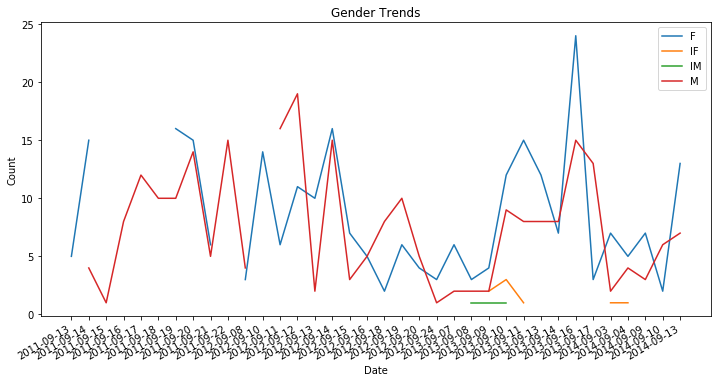

In [314]:
plt.rcParams['figure.figsize'] = [12, 6]
fig, ax = plt.subplots(nrows = 1, ncols = 1)

dates = sex['Date'].unique()
print(len(dates))
for key, grp in sex.groupby(['Sex']):  
    grp = pd.DataFrame(dates, columns=['Date']).merge(grp, how='left',on='Date')
    print(len(grp))
    ax.plot(grp['Date'], grp['Count'], label=key) 

fig.autofmt_xdate()
ax.set_title('Gender Trends')
ax.set_xlabel('Date')
ax.set_ylabel('Count')
plt.legend(loc='best')    
plt.show()

In [302]:
grp.merge(pd.DataFrame(dates, columns=['Date']), on='Date')

,Sex,Date,Count
0,F,2011-09-13,5
1,F,2011-09-14,15
2,F,2011-09-17,20
3,F,2011-09-19,16
4,F,2011-09-20,15
5,F,2011-09-21,6
6,F,2012-09-08,3
7,F,2012-09-10,14
8,F,2012-09-11,6
9,F,2012-09-12,11
